[3.0520425 7.46461   5.3359222 3.9921377 6.421994  5.5577145 7.3878665
 7.83727   3.4499228 2.4982562 7.1097136 5.17932   2.749924  4.557968
 6.3003592 7.365446  5.4803667 7.363432  7.327342  2.1671062 4.302369
 6.6644497 3.7495096 2.981627  4.67564   4.844453  4.89709   2.6010213
 4.1488323 7.4622636 3.014401  7.7444377 6.0946293 3.9146621 7.747055
 2.3003638 7.8797455 4.4460993 2.0947738 3.5097919 3.3999739 2.663814
 5.5789604 6.64674   7.1050406 3.7521667 7.633664  5.0056887 4.3984394
 7.641349 ]


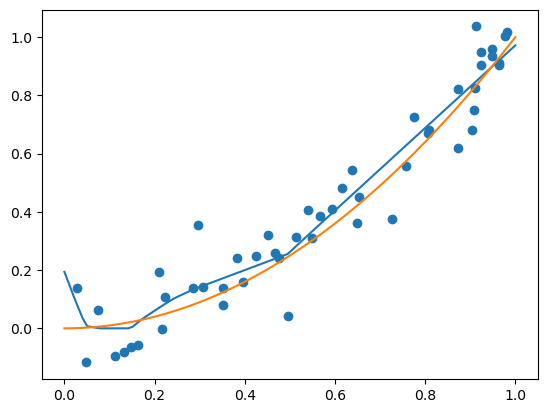

In [67]:

import jax
import jax.numpy as jnp
from jax import vmap, grad
import jax.random as random
from jax.random import PRNGKey
import matplotlib.pyplot as plt


deg = 4

def model(param, x):
    size = param[0][0].shape[0]
    x = jnp.repeat(x, size)
    for (weight, bias) in param:
        x = jnp.maximum(weight @ x  + bias, 0.)
    return x.sum()

def get_param(key, depth, width):
    param = []
    for d in range(depth):
        key, subkey = random.split(key)
        subkey, subkey2 = random.split(subkey)
        weight = random.normal(subkey, (width, width)) * 0.1
        bias = random.normal(subkey2, (width,)) * 0.1
        param.append((weight, bias))
    return param

def loss(param, x_data, y_data):
    l2reg = 0.01
    tikhonov = sum(jnp.sum(w**2) for w, _ in param) * l2reg
    return jnp.mean((vmap(model, (None, 0))(param, x_data) - y_data)**2) #+ tikhonov

def update_param(param, grad_param, lr):
    return [(w - lr * dw, b - lr * db) for (w, b), (dw, db) in zip(param, grad_param)]

param = get_param(PRNGKey(0), 2, 40)


f = lambda x: x**2
N_data = 50
x_data = random.uniform(PRNGKey(1), (N_data,))
y_data = f(x_data) + random.normal(PRNGKey(2), (N_data,)) * 0.1


print(vmap(model, (None, 0))(param, x_data))
for i in range(5000):
    grad_param = grad(loss)(param, x_data, y_data)
    param = update_param(param, grad_param, 0.002)


x = jnp.linspace(0, 1, 100)
y = vmap(model, (None, 0))(param, x)


plt.plot(x, y)
plt.scatter(x_data, y_data)
plt.plot(x, f(x))

    

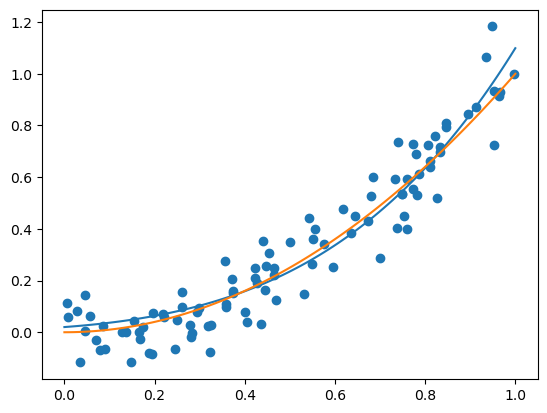

In [61]:
plt.plot(x, y)
plt.scatter(x_data, y_data)
plt.plot(x, f(x))